In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [2]:
red = pd.read_csv('winequality-red.csv')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


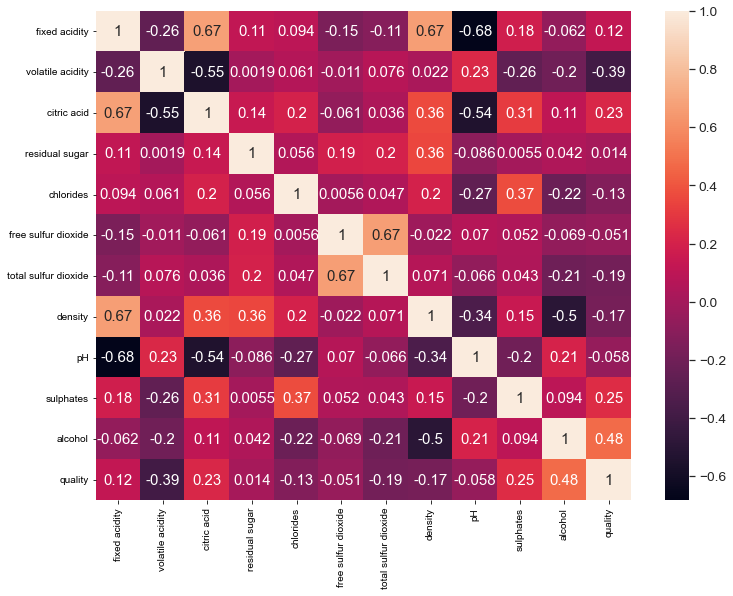

In [5]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.set(font_scale = 1.25)

correlation_mat = red.corr()

sns.heatmap(correlation_mat, annot = True, ax = ax)

plt.show()

In [6]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

In [7]:
columns = ['volatile acidity', 'alcohol', 'sulphates', 'citric acid']

In [8]:
red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

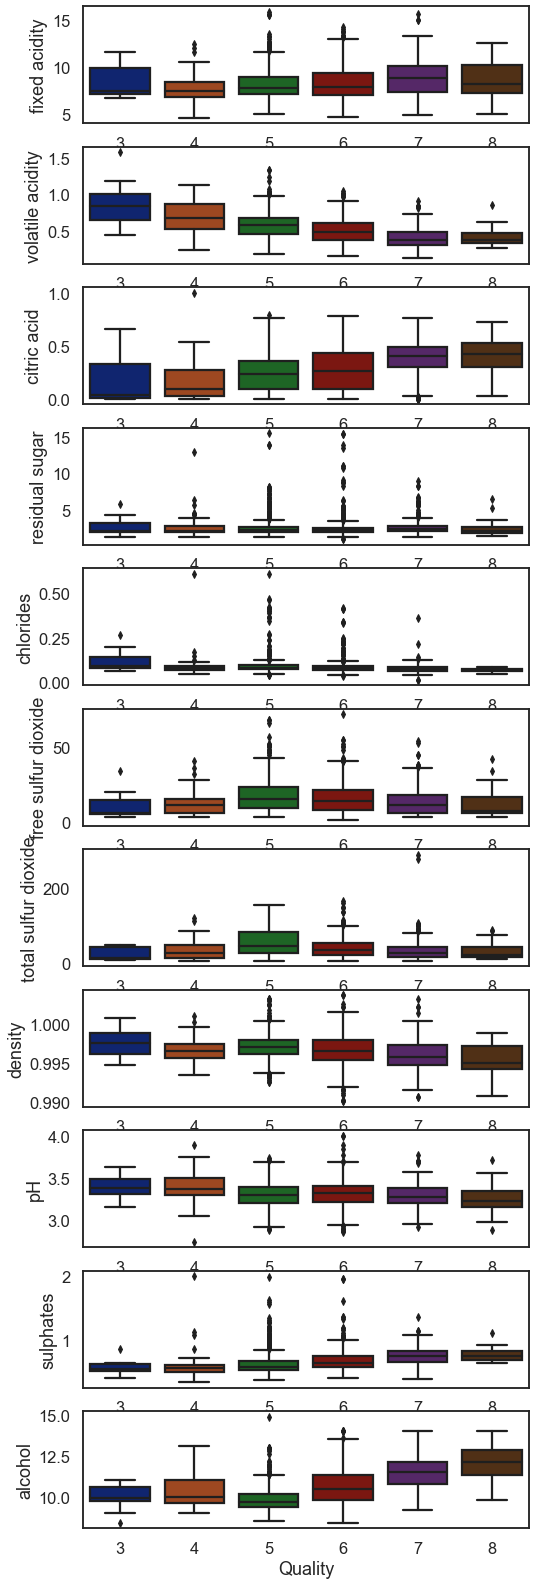

In [9]:
fig, axs = plt.subplots(11, figsize=(8,28), frameon = False)
for i in range(11):
    sns.boxplot(x = red.quality, y = red.iloc[:,i], ax = axs[i]) #(height = red.iloc[:,i], x = red.quality)
    axs[i].set_ylabel(red.columns[i])

plt.xlabel('Quality')
plt.show()

In [10]:
red['quality']=[1 if x>=7 else 0 for x in red.quality]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


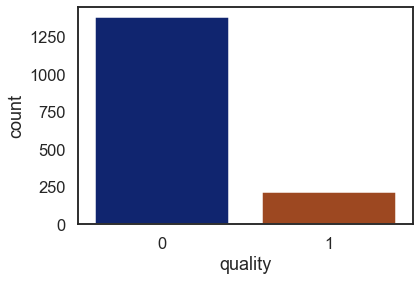

In [11]:
sns.countplot(red['quality'])

In [12]:
X = red[columns]
y = red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [13]:
minmax = StandardScaler()
#minmax = MinMaxScaler()
fitter = minmax.fit(X_train)
X_train_s = fitter.transform(X_train)
X_test_s = fitter.transform(X_test)

In [14]:
rfc = RandomForestClassifier(n_estimators=50)

fit_rnd = rfc.fit(X_train_s,y_train)

print(classification_report(y_test, rfc.predict(X_test_s)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       285
           1       0.53      0.57      0.55        35

    accuracy                           0.90       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.90      0.90      0.90       320



In [15]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 15)
rfc_eval.mean()

0.8968445052439582